In [5]:
import os
os.chdir("..")

In [6]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import math

from concord_ml.bcd import BayesianChangepointDetection
from concord_ml.bcd.distributions import Gaussian

In [7]:
def hazard(p):
    def geometric(t):
        return p * (1 - p) ** t
    return geometric

p = .4

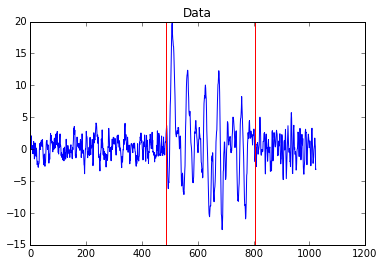

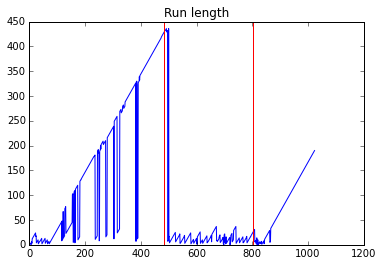

In [8]:
def test1():
    X = np.zeros(1024)
    e = np.random.normal(size=1024)
    for t in np.arange(1, 484):
        X[t] = .75 * X[t-1] + e[t]
    for t in np.arange(484, 803):
        X[t] = 1.7 * X[t-1] - .75 * X[t-2] + e[t]
    for t in np.arange(803, 1024):
        X[t] = 1.25 * X[t-1] - .7 * X[t-2] + e[t]
    return X

data = test1()
plt.title("Data")
plt.plot(data)
plt.axvline(484, color='r')
plt.axvline(803, color='r')
plt.show()

detector = BayesianChangepointDetection(hazard(p), Gaussian(1, 0, 1, 0.1))
results = [detector.step(datum) for datum in data]
plt.title("Run length")
plt.plot([result.argmax() for result in results])
plt.axvline(484, color='r')
plt.axvline(803, color='r')
plt.show()

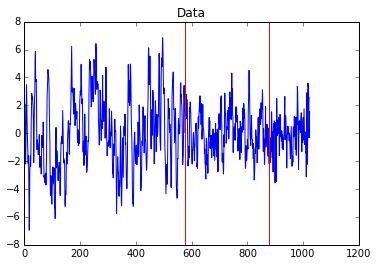

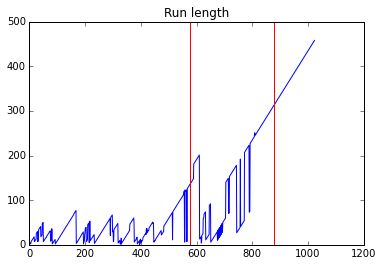

In [9]:
def test2():
    X = np.zeros(1024)
    e = np.random.normal(size=1024)
    for t in np.arange(1, 576):
        X[t] = .75 * X[t-1] + e[t] + .75 * e[t-1]
    for t in np.arange(576, 879):
        X[t] = .75 * X[t-1] + e[t]
    for t in np.arange(879, 1024):
        X[t] = e[t] + .75 * e[t-1]
    return X

data = test2()
plt.title("Data")
plt.plot(data)
plt.axvline(576, color='r')
plt.axvline(879, color='r')
plt.show()

detector = BayesianChangepointDetection(hazard(p), Gaussian(1, 0, 1, 0.1))
results = [detector.step(datum) for datum in data]
plt.title("Run length")
plt.plot([result.argmax() for result in results])
plt.axvline(576, color='r')
plt.axvline(879, color='r')
plt.show()

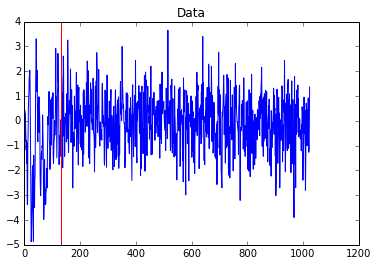

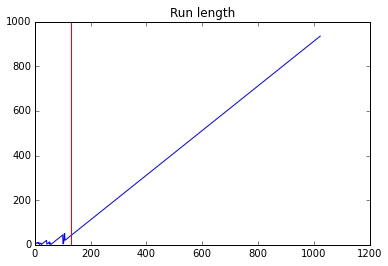

In [10]:
def test3():
    X = np.zeros(1024)
    e = np.random.normal(size=1024)
    for t in np.arange(1, 131):
        X[t] = .9 * X[t-1] + e[t]
    for t in np.arange(131, 1024):
        X[t] = .25 * X[t-1] + e[t]
    return X

data = test3()
plt.title("Data")
plt.plot(data)
plt.axvline(131, color='r')
plt.show()

detector = BayesianChangepointDetection(hazard(p), Gaussian(1, 0, 1, 0.1))
results = [detector.step(datum) for datum in data]
plt.title("Run length")
plt.plot([result.argmax() for result in results])
plt.axvline(131, color='r')
plt.show()

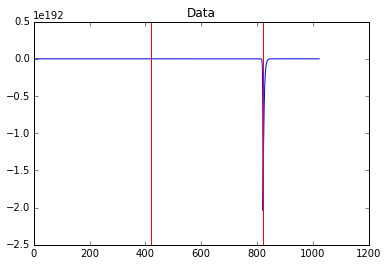

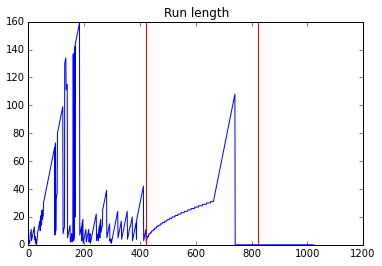

In [11]:
def test4():
    X = np.zeros(1024)
    e = np.random.normal(size=1024)
    for t in np.arange(1, 421):
        X[t] = .75 * X[t-1] + e[t]
    # Diverges very quickly from this point onward
    for t in np.arange(421, 823):
        X[t] = 4 * (.75 * X[t-1] + e[t])
    for t in np.arange(823, 1024):
        X[t] = .75 * X[t-1] + e[t]
    return X

data = test4()
plt.title("Data")
plt.plot(data)
plt.axvline(421, color='r')
plt.axvline(823, color='r')
plt.show()

detector = BayesianChangepointDetection(hazard(p), Gaussian(1, 0, 1, 0.1))
results = [detector.step(datum) for datum in data]
plt.title("Run length")
plt.plot([result.argmax() for result in results])
plt.axvline(421, color='r')
plt.axvline(823, color='r')
plt.show()

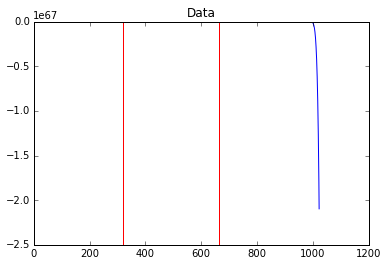

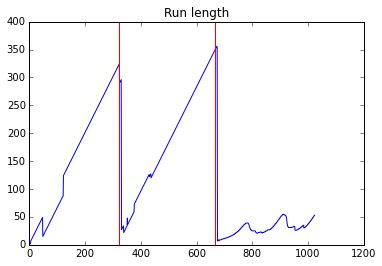

In [12]:
def test5():
    X = np.zeros(1024)
    e = np.random.normal(size=1024)
    a = 1 - .5 * np.cos(16 * math.pi * np.arange(1024) / 1024)
    for t in np.arange(1, 321):
        X[t] = a[t] * e[t]
    for t in np.arange(321, 665):
        X[t] = 5 * a[t] * e[t]
    # Diverges very quickly from this point onward
    for t in np.arange(665, 1024):
        X[t] = a[t] * X[t-1] + .81 * X[t-2] + e[t]
    return X

data = test5()
plt.title("Data")
plt.plot(data)
plt.axvline(321, color='r')
plt.axvline(665, color='r')
plt.show()

detector = BayesianChangepointDetection(hazard(p), Gaussian(1, 0, 1, 0.1))
results = [detector.step(datum) for datum in data]
plt.title("Run length")
plt.plot([result.argmax() for result in results])
plt.axvline(321, color='r')
plt.axvline(665, color='r')
plt.show()

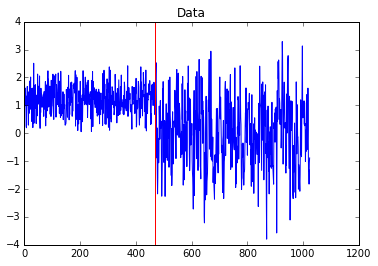

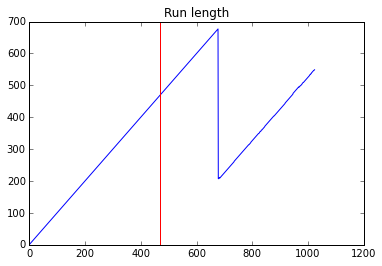

In [13]:
def test6():
    X = np.zeros(1024)
    e = np.random.normal(size=1024)
    for t in np.arange(1, 470):
        X[t] = math.sqrt(abs(2 * e[t]))
    for t in np.arange(470, 1024):
        X[t] = .5 * X[t-1] + e[t]
    return X

data = test6()
plt.title("Data")
plt.plot(data)
plt.axvline(470, color='r')
plt.show()

detector = BayesianChangepointDetection(hazard(p), Gaussian(1, 0, 1, 0.1))
results = [detector.step(datum) for datum in data]
plt.title("Run length")
plt.plot([result.argmax() for result in results])
plt.axvline(470, color='r')
plt.show()

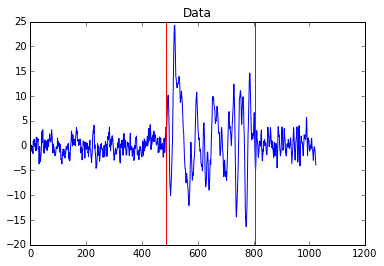

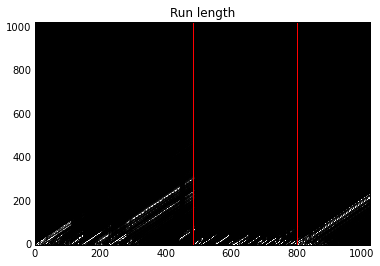

In [14]:
def test1():
    X = np.zeros(1024)
    e = np.random.normal(size=1024)
    for t in np.arange(1, 484):
        X[t] = .75 * X[t-1] + e[t]
    for t in np.arange(484, 803):
        X[t] = 1.7 * X[t-1] - .75 * X[t-2] + e[t]
    for t in np.arange(803, 1024):
        X[t] = 1.25 * X[t-1] - .7 * X[t-2] + e[t]
    return X

data = test1()
plt.title("Data")
plt.plot(data)
plt.axvline(484, color='r')
plt.axvline(803, color='r')
plt.show()
plt.axvline(484, color='r')
plt.axvline(803, color='r')

detector = BayesianChangepointDetection(hazard(p), Gaussian(1, 0, 1, 0.1))
results = [detector.step(datum) for datum in data]
plt.title("Run length")
a = np.array([np.pad(result, (0, results[-1].shape[0]-len(result)), 'constant', constant_values=0) for result in results])
plt.pcolormesh(a.T, vmax=.1, cmap='gray')
plt.xlim(0, a.shape[0])
plt.ylim(0, a.shape[1])
plt.show()